
# Credit Card Customer Spend & Repayment Analysis (Python)

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

sns.set(style="whitegrid")

In [5]:
cust_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\2. Case Study 2 - Credit Card Case Study\Customer Acqusition.csv"
spend_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\2. Case Study 2 - Credit Card Case Study\spend.csv"
repay_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\2. Case Study 2 - Credit Card Case Study\Repayment.csv"
credit_card_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\2. Case Study 2 - Credit Card Case Study\Credit Card Data.xlsx"

In [6]:
cust_path, spend_path, repay_path, credit_card_path

('G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\2. Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv',
 'G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\2. Case Study 2 - Credit Card Case Study\\spend.csv',
 'G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\2. Case Study 2 - Credit Card Case Study\\Repayment.csv',
 'G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\2. Case Study 2 - Credit Card Case Study\\Credit Card Data.xlsx')

In [7]:
cust = pd.read_csv(cust_path)
spend = pd.read_csv(spend_path)
repay = pd.read_csv(repay_path)

print("Customer Acquisition shape:", cust.shape)
print("Spend shape:", spend.shape)
print("Repayment shape:", repay.shape)

Customer Acquisition shape: (100, 8)
Spend shape: (1500, 5)
Repayment shape: (1523, 5)


In [8]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [9]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [10]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN



### 1.1 Basic cleaning and date handling

In [12]:
cust.columns = [c.strip().lower().replace(" ", "_") for c in cust.columns]
spend.columns = [c.strip().lower().replace(" ", "_") for c in spend.columns]
repay.columns = [c.strip().lower().replace(" ", "_") for c in repay.columns]

print("Customer columns:", cust.columns.tolist())
print("Spend columns:", spend.columns.tolist())
print("Repayment columns:", repay.columns.tolist())

Customer columns: ['no', 'customer', 'age', 'city', 'product', 'limit', 'company', 'segment']
Spend columns: ['sl_no:', 'customer', 'month', 'type', 'amount', 'date', 'year', 'year_month']
Repayment columns: ['sl_no:', 'customer', 'month', 'amount', 'unnamed:_4', 'date', 'year', 'year_month']


In [13]:
date_cols = [c for c in spend.columns if 'month' in c or 'date' in c]
if date_cols:
    spend['date'] = pd.to_datetime(spend[date_cols[0]])
else:    
    if 'month' in spend.columns:
        spend['date'] = pd.to_datetime(spend['month'])

date_cols_r = [c for c in repay.columns if 'month' in c or 'date' in c]
if date_cols_r:
    repay['date'] = pd.to_datetime(repay[date_cols_r[0]])
else:
    if 'month' in repay.columns:
        repay['date'] = pd.to_datetime(repay['month'])

In [14]:
for df in (spend, repay):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['year_month'] = df['date'].dt.to_period('M').astype(str)

spend[['date', 'year', 'month', 'year_month']].head()

,date,year,month,year_month
0,1970-01-01 00:00:00.000000001,1970,1,1970-01
1,1970-01-01 00:00:00.000000001,1970,1,1970-01
2,1970-01-01 00:00:00.000000001,1970,1,1970-01
3,1970-01-01 00:00:00.000000001,1970,1,1970-01
4,1970-01-01 00:00:00.000000001,1970,1,1970-01



## 2. Question 1


In [15]:

# 1(a) Fix age < 18
age_col = 'age'
if age_col in cust.columns:
    mean_age = cust.loc[cust[age_col] >= 18, age_col].mean()
    print("Mean age (>=18):", mean_age)
    cust.loc[cust[age_col] < 18, age_col] = round(mean_age)
else:
    print("Age column not found in customer data!")

cust[age_col].describe()


Mean age (>=18): 48.52127659574468


count    100.000000
mean      48.550000
std       16.395599
min       19.000000
25%       35.000000
50%       49.000000
75%       60.250000
max       79.000000
Name: age, dtype: float64

In [16]:
cust_id_candidates = [c for c in cust.columns if 'cust' in c or 'customer' in c]
spend_id_candidates = [c for c in spend.columns if 'cust' in c or 'customer' in c]
repay_id_candidates = [c for c in repay.columns if 'cust' in c or 'customer' in c]

cust_id = cust_id_candidates[0]
spend_id = spend_id_candidates[0]
repay_id = repay_id_candidates[0]

print("Customer id column:", cust_id)
print("Spend id column   :", spend_id)
print("Repay id column   :", repay_id)


limit_candidates = [c for c in cust.columns if 'limit' in c]
card_limit_col = limit_candidates[0]
print("Card limit column :", card_limit_col)

# 1(b) Fix spend amount > limit
amount_cols_spend = [c for c in spend.columns if 'amount' in c or 'spend' in c]
spend_amt_col = amount_cols_spend[0]
print("Spend amount column:", spend_amt_col)

spend_merged = spend.merge(cust[[cust_id, card_limit_col]], left_on=spend_id, right_on=cust_id, how='left')

mask_spend_over = spend_merged[spend_amt_col] > spend_merged[card_limit_col]
print("Number of spend rows > limit:", mask_spend_over.sum())

spend_merged.loc[mask_spend_over, spend_amt_col] = 0.5 * spend_merged.loc[mask_spend_over, card_limit_col]

spend_clean = spend_merged.copy()

spend_clean[[spend_id, spend_amt_col, card_limit_col]].head()


Customer id column: customer
Spend id column   : customer
Repay id column   : customer
Card limit column : limit
Spend amount column: amount
Number of spend rows > limit: 607


,customer,amount,limit
0,A1,485470.80,500000.0
1,A1,410556.13,500000.0
2,A1,23740.46,500000.0
3,A1,484342.47,500000.0
4,A1,369694.07,500000.0


In [17]:

#1(c) Fix repayment amount > limit
amount_cols_repay = [c for c in repay.columns if 'amount' in c or 'payment' in c or 'repay' in c]
repay_amt_col = amount_cols_repay[0]
print("Repayment amount column:", repay_amt_col)

repay_merged = repay.merge(cust[[cust_id, card_limit_col]], left_on=repay_id, right_on=cust_id, how='left')

mask_repay_over = repay_merged[repay_amt_col] > repay_merged[card_limit_col]
print("Number of repayment rows > limit:", mask_repay_over.sum())

repay_merged.loc[mask_repay_over, repay_amt_col] = repay_merged.loc[mask_repay_over, card_limit_col]

repay_clean = repay_merged.copy()

repay_clean[[repay_id, repay_amt_col, card_limit_col]].head()


Repayment amount column: amount
Number of repayment rows > limit: 600


,customer,amount,limit
0,A1,495414.75,500000.0
1,A1,245899.02,500000.0
2,A1,259490.06,500000.0
3,A1,437555.12,500000.0
4,A1,165972.88,500000.0



## 3. Question 2


In [18]:

# 2(a) Number of distinct customers
n_customers = cust[cust_id].nunique()

# 2(b) Number of distinct categories

cat_candidates = [c for c in spend_clean.columns if 'cat' in c]
category_col = cat_candidates[0] if cat_candidates else None

n_categories = spend_clean[category_col].nunique() if category_col else None

print("Distinct customers:", n_customers)
print("Distinct categories:", n_categories)


Distinct customers: 100
Distinct categories: None


In [19]:
# Spend per customer per month
monthly_spend_cust = (
    spend_clean
    .groupby([spend_id, 'year_month'])[spend_amt_col]
    .sum()
    .reset_index(name='monthly_spend')
)

avg_monthly_spend_per_customer = monthly_spend_cust['monthly_spend'].mean()
print("Average monthly spend per customer:", round(avg_monthly_spend_per_customer, 2))

# Repayment per customer per month
monthly_repay_cust = (
    repay_clean
    .groupby([repay_id, 'year_month'])[repay_amt_col]
    .sum()
    .reset_index(name='monthly_repay')
)

avg_monthly_repay_per_customer = monthly_repay_cust['monthly_repay'].mean()
print("Average monthly repayment per customer:", round(avg_monthly_repay_per_customer, 2))


Average monthly spend per customer: 2197810.85
Average monthly repayment per customer: 2449823.6


In [20]:

# 2(e) Monthly profit and bank interest @ 2.9%

# Monthly total spend
monthly_spend = (
    spend_clean
    .groupby('year_month')[spend_amt_col]
    .sum()
    .reset_index(name='total_spend')
)

# Monthly total repayment
monthly_repay = (
    repay_clean
    .groupby('year_month')[repay_amt_col]
    .sum()
    .reset_index(name='total_repay')
)

monthly_summary = monthly_spend.merge(monthly_repay, on='year_month', how='outer').fillna(0)
monthly_summary['monthly_profit'] = monthly_summary['total_repay'] - monthly_summary['total_spend']

interest_rate = 0.029
monthly_summary['interest_earned'] = monthly_summary['monthly_profit'].clip(lower=0) * interest_rate

monthly_summary.sort_values('year_month')


,year_month,total_spend,total_repay,monthly_profit,interest_earned
0,1970-01,2.197811e+08,2.449824e+08,25201274.86,730836.97094
1,NaT,0.000000e+00,0.000000e+00,0.00,0.00000


In [21]:

# 2(f) Top 5 product types (by number of cards issued)
prod_candidates = [c for c in cust.columns if 'type' in c or 'product' in c]
product_col = prod_candidates[0]
top5_products = (
    cust[product_col]
    .value_counts()
    .head(5)
    .reset_index(name='count')
    .rename(columns={'index': product_col})
)
top5_products


,product,count
0,Gold,38
1,Platimum,32
2,Silver,30


In [22]:

# 2(g) City with maximum spend (total over the entire period)

city_candidates = [c for c in cust.columns if 'city' in c]
city_col = city_candidates[0]

spend_city = (
    spend_clean
    .merge(cust[[cust_id, city_col]], left_on=spend_id, right_on=cust_id, how='left')
    .groupby(city_col)[spend_amt_col]
    .sum()
    .reset_index(name='total_spend')
    .sort_values('total_spend', ascending=False)
)

max_spend_city = spend_city.iloc[0]
spend_city, max_spend_city


(         city  total_spend
 4      COCHIN  45963513.50
 2    CALCUTTA  41108132.30
 0   BANGALORE  40461647.02
 1      BOMBAY  28603127.38
 3     CHENNAI  22128635.65
 7  TRIVANDRUM  15337155.87
 6       PATNA  15260586.97
 5       DELHI  10918286.54,
 city               COCHIN
 total_spend    45963513.5
 Name: 4, dtype: object)

In [23]:

# 2(h) Which age group is spending more?

# Define age bins
bins = [17, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '55+']
cust['age_group'] = pd.cut(cust[age_col], bins=bins, labels=labels)

spend_age = (
    spend_clean
    .merge(cust[[cust_id, 'age_group']], left_on=spend_id, right_on=cust_id, how='left')
    .groupby('age_group')[spend_amt_col]
    .sum()
    .reset_index(name='total_spend')
    .sort_values('total_spend', ascending=False)
)

spend_age


,age_group,total_spend
3,46-55,60884178.22
4,55+,50816959.34
2,36-45,46312437.21
1,26-35,37337313.16
0,18-25,24430197.30


In [24]:

# 2(i) Top 10 customers in terms of total repayment

top10_repay = (
    repay_clean
    .groupby(repay_id)[repay_amt_col]
    .sum()
    .reset_index(name='total_repay')
    .sort_values('total_repay', ascending=False)
    .head(10)
)

top10_repay


,customer,total_repay
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86



## 4. Question 3

In [25]:
spend_full = spend_clean.merge(
    cust[[cust_id, city_col, product_col]],
    left_on=spend_id,
    right_on=cust_id,
    how='left'
)

city_product_year = (
    spend_full
    .groupby([city_col, product_col, 'year'])[spend_amt_col]
    .sum()
    .reset_index(name='yearly_spend')
)

city_product_year.head()


,city,product,year,yearly_spend
0,BANGALORE,Gold,1970,34212852.62
1,BANGALORE,Platimum,1970,2710848.54
2,BANGALORE,Silver,1970,3537945.86
3,BOMBAY,Gold,1970,23888016.12
4,BOMBAY,Platimum,1970,2581199.89


In [26]:
city_product_year_pivot = city_product_year.pivot_table(
    index=[city_col, 'year'],
    columns=product_col,
    values='yearly_spend',
    aggfunc='sum'
).fillna(0)

city_product_year_pivot


,product,Gold,Platimum,Silver
city,year,,,
BANGALORE,1970,34212852.62,2710848.54,3537945.86
BOMBAY,1970,23888016.12,2581199.89,2133911.37
CALCUTTA,1970,28948029.55,10061993.27,2098109.48
CHENNAI,1970,7504852.70,13614532.10,1009250.85
COCHIN,1970,29925605.56,13301418.07,2736489.87
DELHI,1970,7728443.59,954459.47,2235383.48
PATNA,1970,7601365.36,5252438.32,2406783.29
TRIVANDRUM,1970,6391189.56,7910523.72,1035442.59


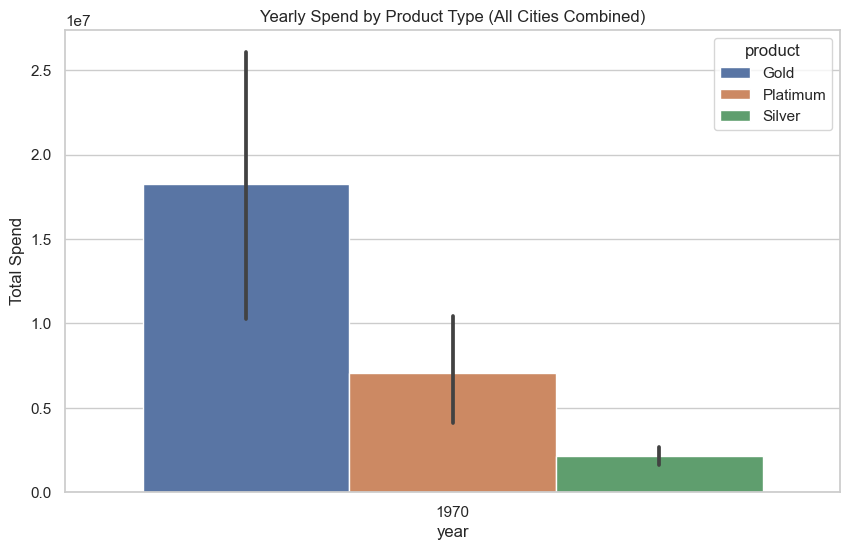

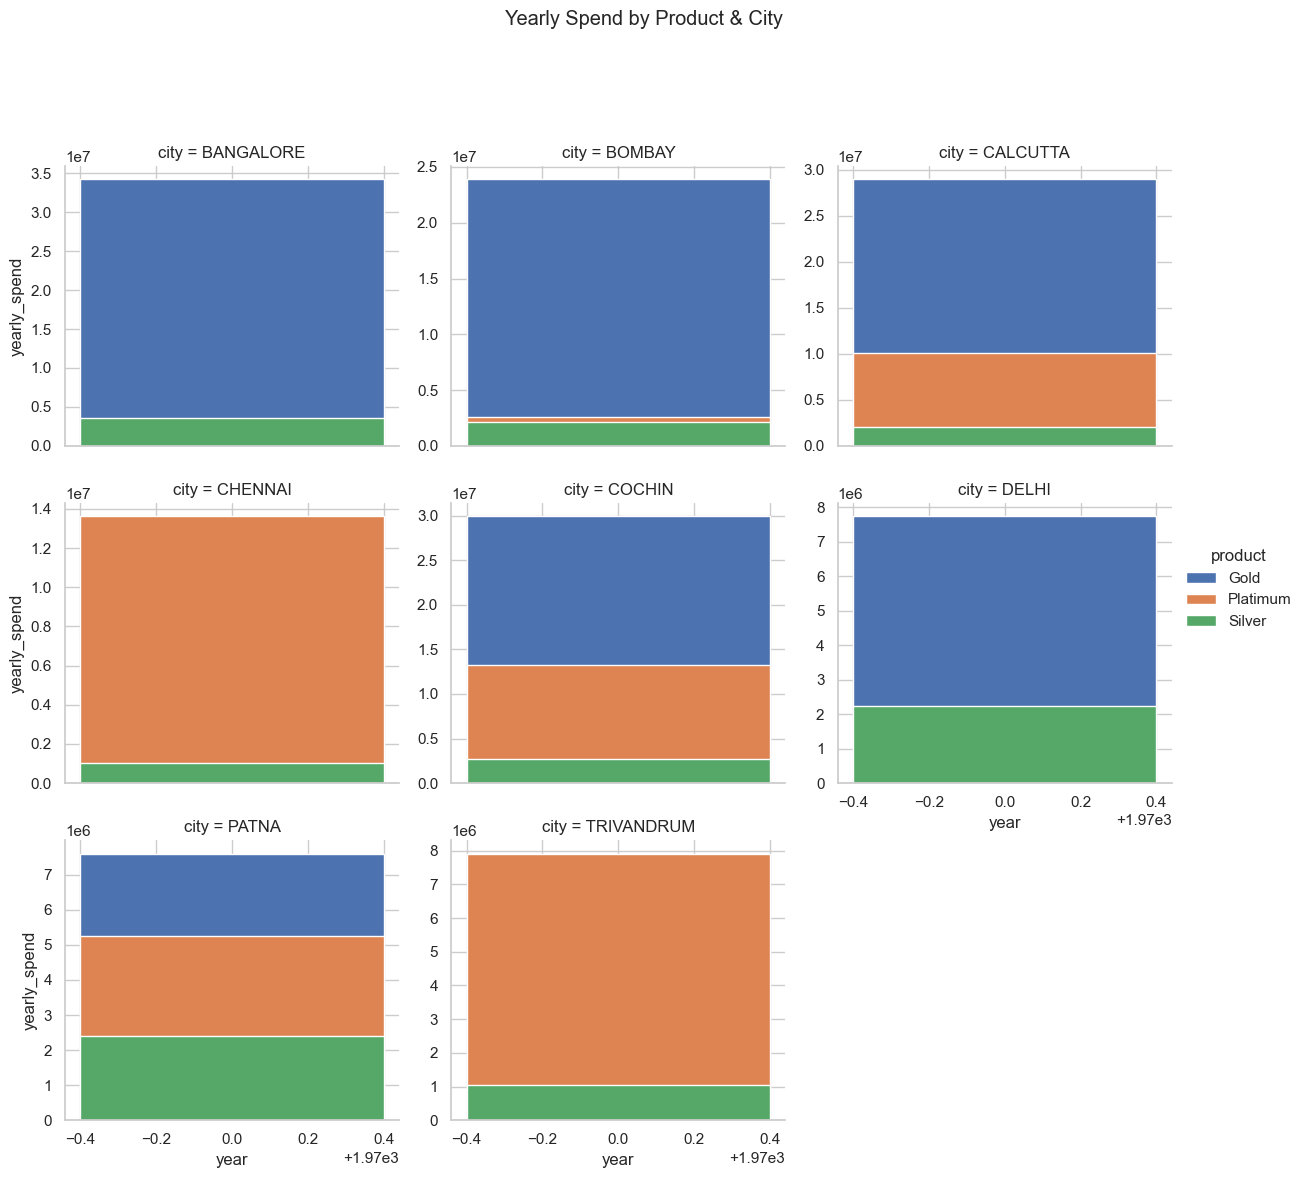

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_product_year,
    x='year',
    y='yearly_spend',
    hue=product_col
)
plt.title('Yearly Spend by Product Type (All Cities Combined)')
plt.ylabel('Total Spend')
plt.show()

# Facet by city
g = sns.FacetGrid(city_product_year, col=city_col, hue=product_col, col_wrap=3, sharey=False, height=4)
g.map(plt.bar, 'year', 'yearly_spend')
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Yearly Spend by Product & City')
plt.show()



## 5. Question 4

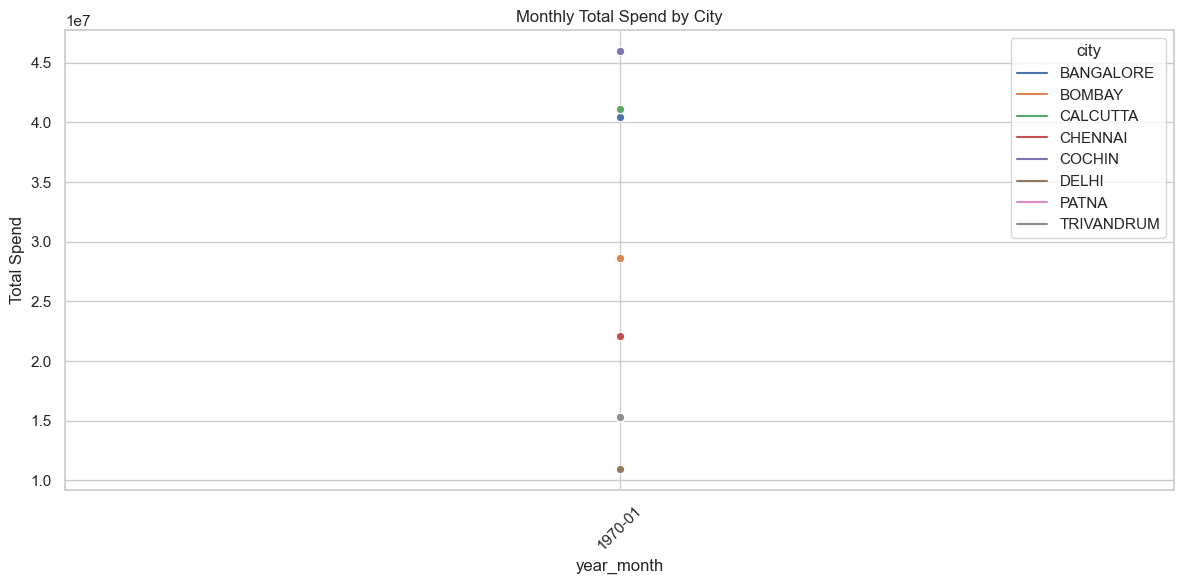

In [28]:

# 4(a) Monthly comparison of total spends, city-wise

monthly_city_spend = (
    spend_full
    .groupby(['year_month', city_col])[spend_amt_col]
    .sum()
    .reset_index(name='total_spend')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_city_spend, x='year_month', y='total_spend', hue=city_col, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Total Spend by City')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()


In [29]:

# 4(b) Yearly spend on air tickets

if category_col:
    air_tickets = spend_full[spend_full[category_col].str.contains('AIR', case=False, na=False)]
    yearly_air = (
        air_tickets
        .groupby('year')[spend_amt_col]
        .sum()
        .reset_index(name='air_ticket_spend')
    )

    plt.figure(figsize=(8, 5))
    sns.barplot(data=yearly_air, x='year', y='air_ticket_spend')
    plt.title('Yearly Spend on Air Tickets')
    plt.ylabel('Total Spend')
    plt.show()

    yearly_air
else:
    print("No category column found; cannot isolate air ticket spend.")


No category column found; cannot isolate air ticket spend.


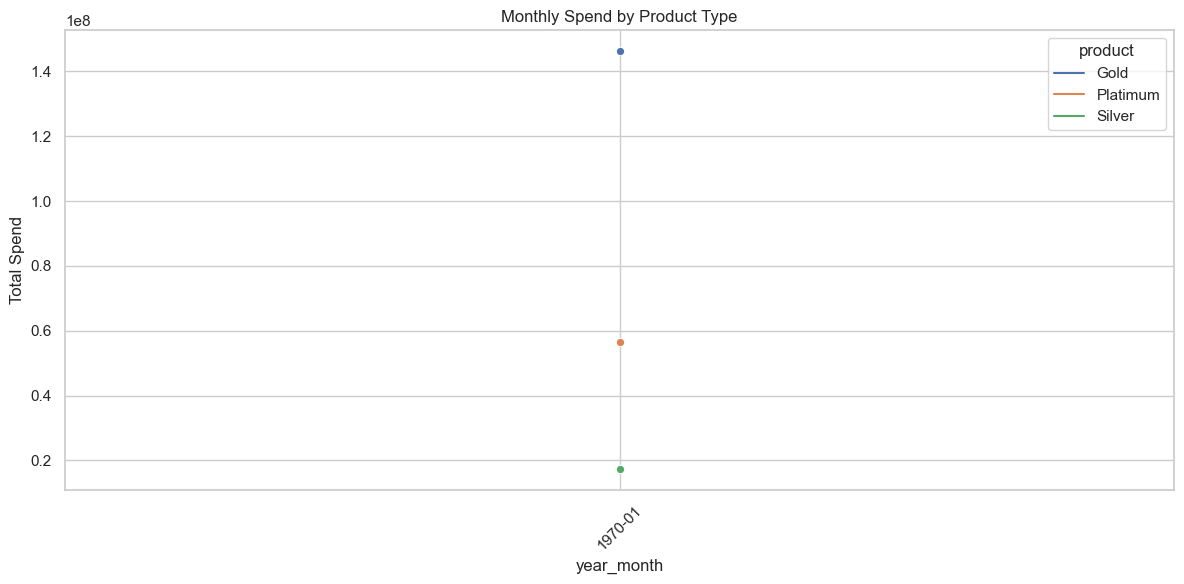

,year_month,product,total_spend
0,1970-01,Gold,1.462004e+08
1,1970-01,Platimum,5.638741e+07
2,1970-01,Silver,1.719332e+07


In [30]:

# 4(c) Monthly spend for each product (seasonality)

monthly_product_spend = (
    spend_full
    .groupby(['year_month', product_col])[spend_amt_col]
    .sum()
    .reset_index(name='total_spend')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_product_spend, x='year_month', y='total_spend', hue=product_col, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Spend by Product Type')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()

monthly_product_spend.head()



## 6. Question 5

In [31]:
repay_full = repay_clean.merge(
    cust[[cust_id, city_col, product_col]],
    left_on=repay_id,
    right_on=cust_id,
    how='left'
)

def top_10_customers_by_repayment(product_type=None, time_period='yearly'):
    """
    Return top 10 customers per city by repayment amount.

    Parameters
    ----------
    product_type : str or None
        Filter for a specific product type (e.g. 'Gold', 'Silver', 'Platinum').
        If None, all product types are included.
    time_period : {'yearly', 'monthly'}
        Aggregation period:
        - 'yearly'  -> group by year
        - 'monthly' -> group by year_month
    """
    df = repay_full.copy()

    if product_type is not None:
        df = df[df[product_col].str.upper() == str(product_type).upper()]

    if time_period == 'yearly':
        group_cols = [city_col, repay_id, 'year']
    elif time_period == 'monthly':
        group_cols = [city_col, repay_id, 'year_month']
    else:
        raise ValueError("time_period must be 'yearly' or 'monthly'")

    agg = (
        df
        .groupby(group_cols)[repay_amt_col]
        .sum()
        .reset_index(name='total_repayment')
    )

    # Rank within each city (and time period if included)
    sort_cols = [city_col]
    if time_period == 'yearly':
        sort_cols.append('year')
    else:
        sort_cols.append('year_month')

    agg['rank'] = agg.groupby(sort_cols)['total_repayment'].rank(method='first', ascending=False)

    top10 = agg[agg['rank'] <= 10].sort_values(sort_cols + ['rank'])

    return top10

# Example usage:
example_top10 = top_10_customers_by_repayment(product_type='Gold', time_period='yearly')
example_top10.head(20)


,city,customer,year,total_repayment,rank
1,BANGALORE,A13,1970.0,9572000.66,1.0
4,BANGALORE,A43,1970.0,8489871.46,2.0
2,BANGALORE,A14,1970.0,7943268.63,3.0
3,BANGALORE,A30,1970.0,6133481.96,4.0
0,BANGALORE,A1,1970.0,4753691.67,5.0
5,BANGALORE,A63,1970.0,999972.72,6.0
8,BANGALORE,A92,1970.0,459105.69,7.0
6,BANGALORE,A81,1970.0,207780.32,8.0
7,BANGALORE,A88,1970.0,146821.30,9.0
9,BOMBAY,A12,1970.0,8334760.16,1.0
